#Problem statement: Prediction of unit-price of cements.

It is a regression problem where we want to predict the unit-price of cements.




In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1gzsCkZ-ZRwUteqMXhHak02MvB3e1LLJA'
file_name= 'final_data.csv'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(file_name)

#Step 1:Data Collection


In [0]:
!pip install pandas
!pip install numpy

import numpy as np
import pandas as pd



In [0]:
data= pd.read_excel(file_name, na_values='? ')

We collect a dataset which contains informations of a 

#Step 2: Data exploration

In [0]:
data

,PARTY_CODE,FIN_YEAR,DOCUMENT_TP,DNOTE_NO,DNOTE_ISS_DT,PAYMENT_MODE,QUANTITY_MT,AMOUNT,DO_ISSUED_AMT,TRUCK_FARE,LOADING_CHR,MR_ADJUSTED_AMT,USER_ID,ACTION_DT,DISTRICT_CD
0,A0529,2018/2019,DN,19516,2019-04-18,CQ,141.50,1163130.0,1163130.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,31
1,A0039,2018/2019,DN,19517,2019-04-18,CQ,163.50,1343970.0,1343970.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,31
2,A1695,2018/2019,DN,19518,2019-04-18,CQ,60.00,516000.0,516000.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,97
3,A1316,2018/2019,DN,19519,2019-04-18,CQ,100.00,826000.0,826000.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,105
4,A0477,2018/2019,DN,19520,2019-04-18,CQ,100.00,824000.0,824000.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,105
5,A0497,2018/2019,DN,19521,2019-04-18,CQ,57.00,468540.0,468540.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,31
6,A1709,2018/2019,DN,19522,2019-04-18,CQ,60.00,469200.0,469200.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,26
7,A1709,2018/2019,DN,19523,2019-04-18,CQ,20.00,162000.0,162000.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,104
8,A0502,2018/2019,DN,19524,2019-04-18,CQ,28.50,234270.0,234270.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,31
9,A0497,2018/2019,DN,19525,2019-04-18,CQ,29.00,238380.0,238380.0,0,NaN,0.0,IFTEKHAR1,2019-04-18,31


#Variable Identification

In [0]:
data.dtypes

PARTY_CODE                 object
FIN_YEAR                   object
DOCUMENT_TP                object
DNOTE_NO                    int64
DNOTE_ISS_DT       datetime64[ns]
PAYMENT_MODE               object
QUANTITY_MT               float64
AMOUNT                    float64
DO_ISSUED_AMT             float64
TRUCK_FARE                  int64
LOADING_CHR               float64
MR_ADJUSTED_AMT           float64
USER_ID                    object
ACTION_DT          datetime64[ns]
DISTRICT_CD                object
dtype: object

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64999 entries, 0 to 64998
Data columns (total 15 columns):
PARTY_CODE         64999 non-null object
FIN_YEAR           64999 non-null object
DOCUMENT_TP        64999 non-null object
DNOTE_NO           64999 non-null int64
DNOTE_ISS_DT       64999 non-null datetime64[ns]
PAYMENT_MODE       64999 non-null object
QUANTITY_MT        64999 non-null float64
AMOUNT             64999 non-null float64
DO_ISSUED_AMT      64997 non-null float64
TRUCK_FARE         64999 non-null int64
LOADING_CHR        0 non-null float64
MR_ADJUSTED_AMT    64999 non-null float64
USER_ID            64984 non-null object
ACTION_DT          64984 non-null datetime64[ns]
DISTRICT_CD        54011 non-null object
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 7.4+ MB


In [0]:
#data.isna().sum()
pd.DataFrame(data.isna().sum(), columns=['Missing Values'])

,Missing Values
PARTY_CODE,0
FIN_YEAR,0
DOCUMENT_TP,0
DNOTE_NO,0
DNOTE_ISS_DT,0
PAYMENT_MODE,0
QUANTITY_MT,0
AMOUNT,0
DO_ISSUED_AMT,2
TRUCK_FARE,0


We have to work with these missing values. 

#Univariate Analysis

In [0]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DNOTE_NO,64999.0,8727.833582,5433.573580,1.0,4126.0,8191.0,13116.5,20847.0
QUANTITY_MT,64999.0,30.508542,44.216336,0.5,10.0,20.0,30.0,1800.0
AMOUNT,64999.0,232835.793170,348282.071469,375.0,76400.0,147600.0,244800.0,13968000.0
DO_ISSUED_AMT,64997.0,232666.267310,348774.634864,0.0,76400.0,147584.0,244800.0,13968000.0
TRUCK_FARE,64999.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
LOADING_CHR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MR_ADJUSTED_AMT,64999.0,192307.828883,353897.921999,0.0,0.0,106500.0,217800.0,13968000.0


Here, we can see that DNOTE_NO and QUANTITY_MT have many outliers..

In [0]:
data.describe(include=['object'], exclude=['float64'])

,PARTY_CODE,FIN_YEAR,DOCUMENT_TP,PAYMENT_MODE,USER_ID,DISTRICT_CD
count,64999,64999,64999,64999,64984,54011
unique,1034,5,1,1,9,72
top,A0730,2015/2015,DN,CQ,IFTEKHAR,100
freq,1830,20603,64999,64999,23320,18186


**Count Plot**

<Figure size 432x288 with 0 Axes>

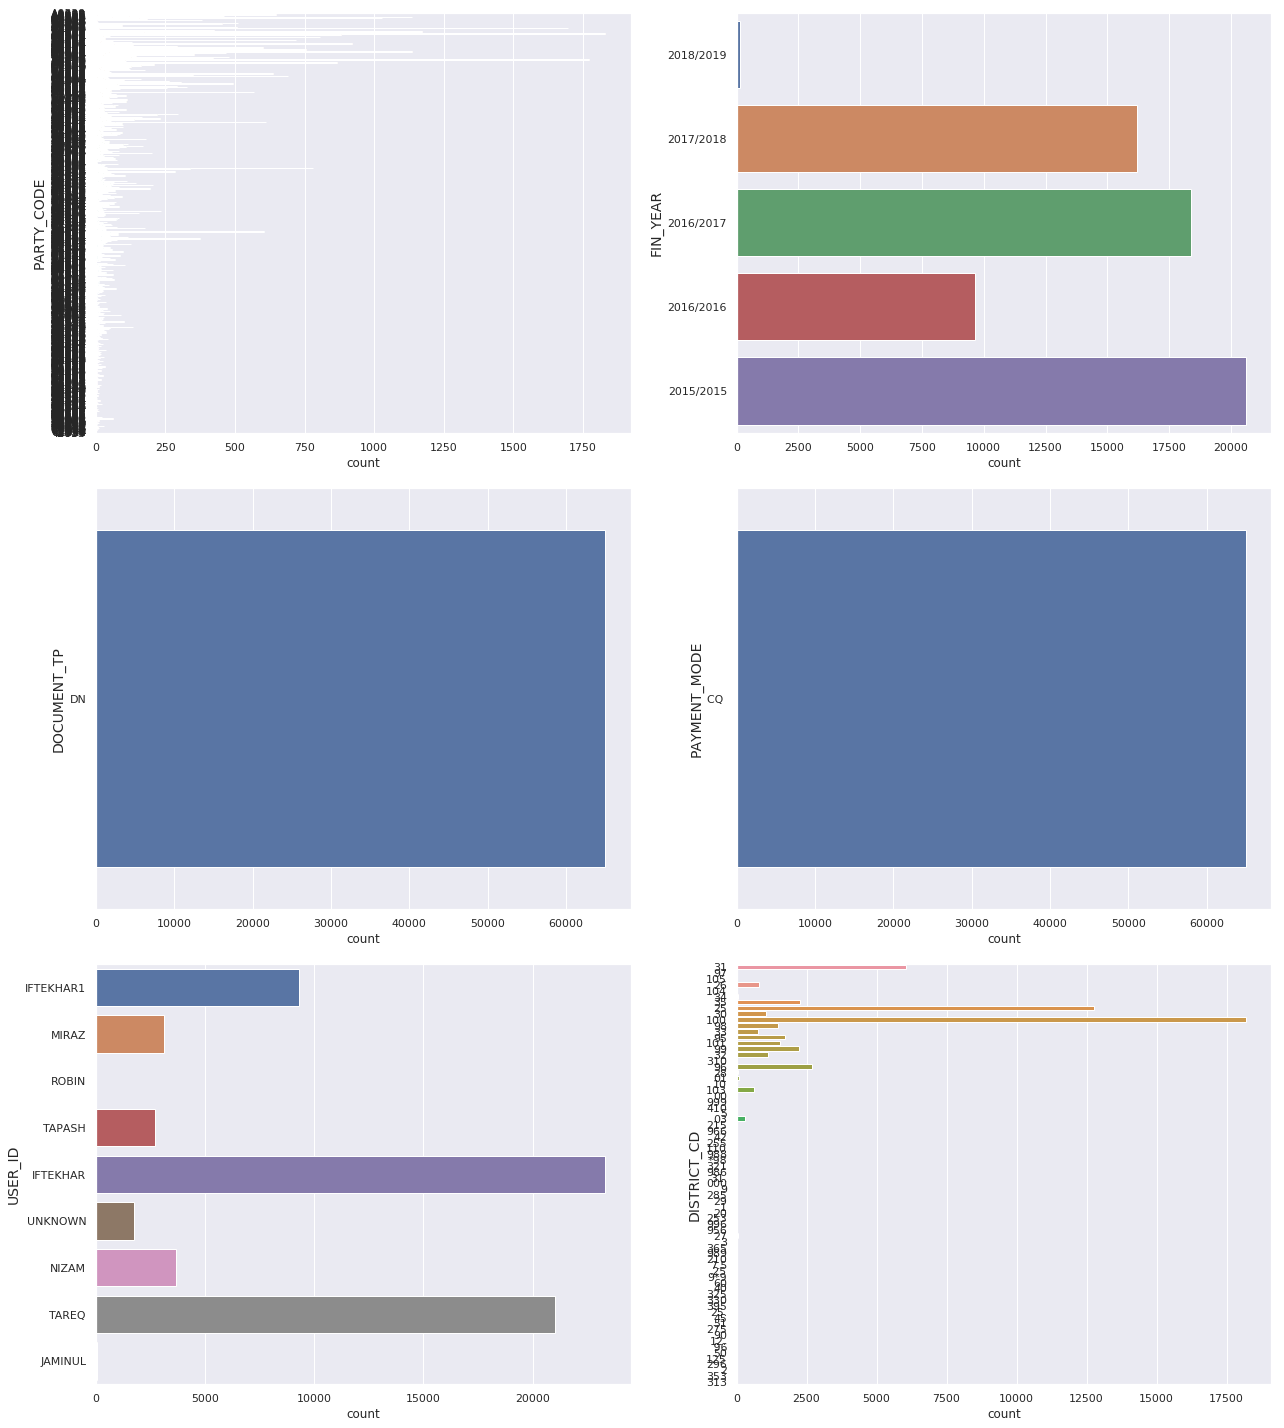

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import numpy as np
import warnings
warnings.filterwarnings('ignore')

cat_cols = data.select_dtypes('O').columns

def count_plot(data, features):
    i = 0
    plt.figure()
    col = 2
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,20))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        ax = sns.countplot(data=data,y=feature)
        ax.set_yticklabels(ax.get_yticklabels())
        plt.tight_layout()
        plt.ylabel(feature, fontsize=14)
    plt.show();
    
count_plot(data, cat_cols)

<Figure size 432x288 with 0 Axes>

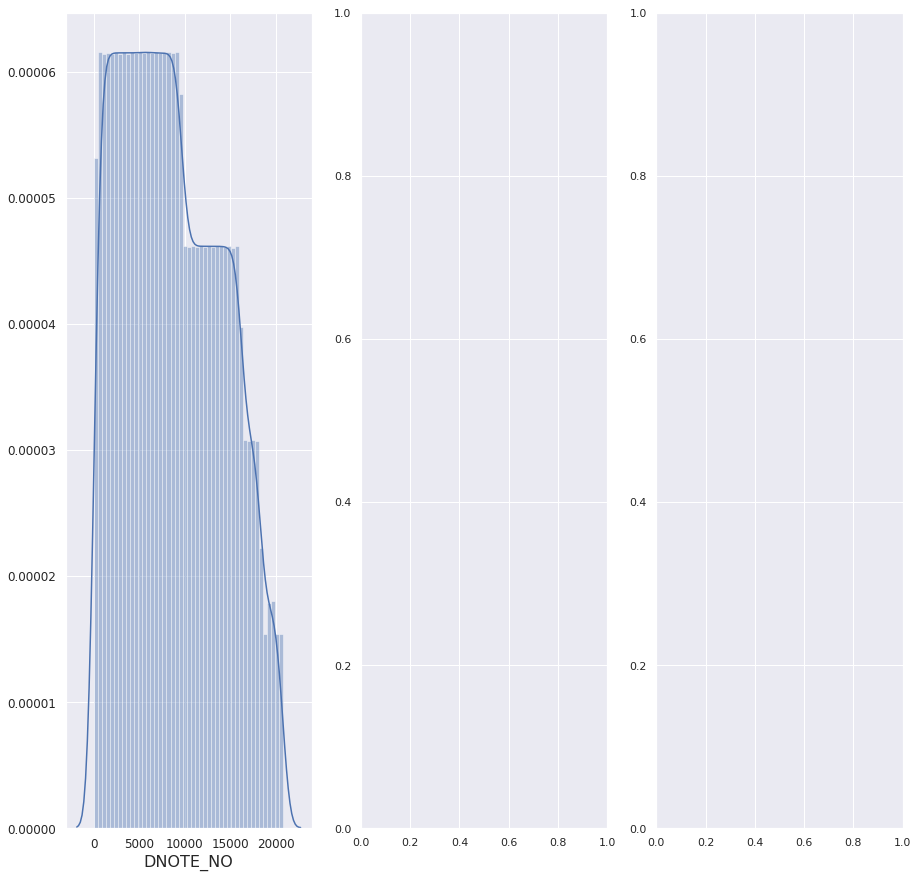

In [0]:
cat_cols = data.select_dtypes('O').columns

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(15,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
#plot_distribution(data, cat_cols)
plot_distribution(data, {'DNOTE_NO'})

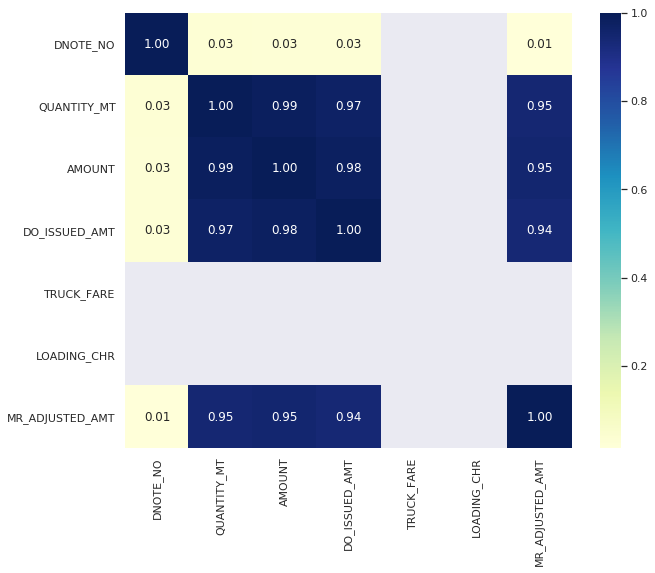

In [0]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f", cmap="YlGnBu");

#Step 3: Data preprocessing


**Cleaning Noises**



In [0]:
#Drop Few columns
data.head()
data=data.drop(['PARTY_CODE'], axis=1)
data=data.drop(['DOCUMENT_TP'], axis=1)
data=data.drop(['TRUCK_FARE'], axis=1)
data=data.drop(['LOADING_CHR'], axis=1)
data=data.drop(['DISTRICT_CD'], axis=1)
data=data.drop(['ACTION_DT'], axis=1)

**Missing Value Treatment**

We have found that our data has missing values in 4 fields. So we need treatment for handling those vissing values in this step. 

**Drop clounm:** First we will try drop clounm which has missing value rate higher than threshold and let see the missing values again.

In [0]:
threshold = 0.4

# Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
FIN_YEAR,0
DNOTE_NO,0
DNOTE_ISS_DT,0
PAYMENT_MODE,0
QUANTITY_MT,0
AMOUNT,0
DO_ISSUED_AMT,2
MR_ADJUSTED_AMT,0
USER_ID,15


**Drop rows:** We see that after the above treatment one column has been dropped and now we try drop rows with missing value rate higher than threshold

In [0]:
threshold = 0.4
# Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]


pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
FIN_YEAR,0
DNOTE_NO,0
DNOTE_ISS_DT,0
PAYMENT_MODE,0
QUANTITY_MT,0
AMOUNT,0
DO_ISSUED_AMT,2
MR_ADJUSTED_AMT,0
USER_ID,15


Now we will apply **Numerical Imputation** and then **Categorical Imputation**

In [0]:
#Fill all numerical columns
num_cols = data.select_dtypes(['int64', 'float']).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

#Fill all categorical columns    

# for col in cat_cols:
#     data[col] = data[col].fillna(data[col].value_counts().idxmax())
    
    
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
FIN_YEAR,0
DNOTE_NO,0
DNOTE_ISS_DT,0
PAYMENT_MODE,0
QUANTITY_MT,0
AMOUNT,0
DO_ISSUED_AMT,0
MR_ADJUSTED_AMT,0
USER_ID,15


Wow, now we have no missing values.

In [0]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data.shape[1], 
                                      data.shape[0],
                                      len(data.select_dtypes('O').columns),
                                      len(data.select_dtypes(['int', 'float']).columns)))
data.head()


No of columns: 9
No of rows: 64999
No of categorical columns: 3
No of numerical columns: 5


,FIN_YEAR,DNOTE_NO,DNOTE_ISS_DT,PAYMENT_MODE,QUANTITY_MT,AMOUNT,DO_ISSUED_AMT,MR_ADJUSTED_AMT,USER_ID
0,2018/2019,19516,2019-04-18,CQ,141.5,1163130.0,1163130.0,0.0,IFTEKHAR1
1,2018/2019,19517,2019-04-18,CQ,163.5,1343970.0,1343970.0,0.0,IFTEKHAR1
2,2018/2019,19518,2019-04-18,CQ,60.0,516000.0,516000.0,0.0,IFTEKHAR1
3,2018/2019,19519,2019-04-18,CQ,100.0,826000.0,826000.0,0.0,IFTEKHAR1
4,2018/2019,19520,2019-04-18,CQ,100.0,824000.0,824000.0,0.0,IFTEKHAR1


**Feature Engineering**

In [0]:
data['date'] = pd.to_datetime(data.DNOTE_ISS_DT, format="%d-%m-%Y")

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day_name'] = data['date'].dt.day_name()

data['unit_price'] = data['AMOUNT']/data['QUANTITY_MT']

data=data.drop(['DNOTE_ISS_DT'], axis=1)
data=data.drop(['date'], axis=1)


data.head()

,FIN_YEAR,DNOTE_NO,PAYMENT_MODE,QUANTITY_MT,AMOUNT,DO_ISSUED_AMT,MR_ADJUSTED_AMT,USER_ID,year,month,day_name,unit_price
0,2018/2019,19516,CQ,141.5,1163130.0,1163130.0,0.0,IFTEKHAR1,2019,4,Thursday,8220.0
1,2018/2019,19517,CQ,163.5,1343970.0,1343970.0,0.0,IFTEKHAR1,2019,4,Thursday,8220.0
2,2018/2019,19518,CQ,60.0,516000.0,516000.0,0.0,IFTEKHAR1,2019,4,Thursday,8600.0
3,2018/2019,19519,CQ,100.0,826000.0,826000.0,0.0,IFTEKHAR1,2019,4,Thursday,8260.0
4,2018/2019,19520,CQ,100.0,824000.0,824000.0,0.0,IFTEKHAR1,2019,4,Thursday,8240.0


Here, we work with '**date**' column and create 3 new columns by feature engineering.
We also create a new column named 'unit-price' by dividing 'AMOUNT' by 'QUANTITY_MT'.

Then we drop 'DNOTE_ISS_DT' and our previous 'date' column.




Now we will work with Categorical fields using One Hot encoding

In [0]:
#Label Encoding for one Field
# cols = {'DISTRICT_CD'}
# for col in cols:
#     data[col] = data[col].astype('category')
#     print(col,'---->', dict(enumerate(data[col].cat.categories)))
#     data[col] = data[col].cat.codes
    
# One Hot Encoding for 3 columns
cat_cols = {'PAYMENT_MODE','FIN_YEAR', 'USER_ID', 'day_name'}

data_encoded = pd.get_dummies(data, columns=cat_cols, prefix=cat_cols)

print("Now our dataset has {} columns.".format(data_encoded.shape[1]))
data_encoded




Now our dataset has 30 columns.


,DNOTE_NO,QUANTITY_MT,AMOUNT,DO_ISSUED_AMT,MR_ADJUSTED_AMT,year,month,unit_price,FIN_YEAR_2015/2015,FIN_YEAR_2016/2016,FIN_YEAR_2016/2017,FIN_YEAR_2017/2018,FIN_YEAR_2018/2019,USER_ID_IFTEKHAR,USER_ID_IFTEKHAR1,USER_ID_JAMINUL,USER_ID_MIRAZ,USER_ID_NIZAM,USER_ID_ROBIN,USER_ID_TAPASH,USER_ID_TAREQ,USER_ID_UNKNOWN,PAYMENT_MODE_CQ,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,19516,141.50,1163130.0,1163130.0,0.0,2019,4,8220.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,19517,163.50,1343970.0,1343970.0,0.0,2019,4,8220.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,19518,60.00,516000.0,516000.0,0.0,2019,4,8600.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,19519,100.00,826000.0,826000.0,0.0,2019,4,8260.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,19520,100.00,824000.0,824000.0,0.0,2019,4,8240.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5,19521,57.00,468540.0,468540.0,0.0,2019,4,8220.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6,19522,60.00,469200.0,469200.0,0.0,2019,4,7820.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
7,19523,20.00,162000.0,162000.0,0.0,2019,4,8100.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,19524,28.50,234270.0,234270.0,0.0,2019,4,8220.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,19525,29.00,238380.0,238380.0,0.0,2019,4,8220.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


#Data segregation


In [0]:

X = data_encoded.loc[:, data_encoded.columns!='unit_price']
y = data_encoded.loc[:, data_encoded.columns=='unit_price']


X.head()

,DNOTE_NO,QUANTITY_MT,AMOUNT,DO_ISSUED_AMT,MR_ADJUSTED_AMT,year,month,FIN_YEAR_2015/2015,FIN_YEAR_2016/2016,FIN_YEAR_2016/2017,FIN_YEAR_2017/2018,FIN_YEAR_2018/2019,USER_ID_IFTEKHAR,USER_ID_IFTEKHAR1,USER_ID_JAMINUL,USER_ID_MIRAZ,USER_ID_NIZAM,USER_ID_ROBIN,USER_ID_TAPASH,USER_ID_TAREQ,USER_ID_UNKNOWN,PAYMENT_MODE_CQ,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,19516,141.5,1163130.0,1163130.0,0.0,2019,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,19517,163.5,1343970.0,1343970.0,0.0,2019,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,19518,60.0,516000.0,516000.0,0.0,2019,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,19519,100.0,826000.0,826000.0,0.0,2019,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,19520,100.0,824000.0,824000.0,0.0,2019,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [0]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(X.values)
X_standered = scaler.transform(X.values)
X_scaled = pd.DataFrame(X_standered, columns=X.columns)


In [0]:
X_scaled.head()

,DNOTE_NO,QUANTITY_MT,AMOUNT,DO_ISSUED_AMT,MR_ADJUSTED_AMT,year,month,FIN_YEAR_2015/2015,FIN_YEAR_2016/2016,FIN_YEAR_2016/2017,FIN_YEAR_2017/2018,FIN_YEAR_2018/2019,USER_ID_IFTEKHAR,USER_ID_IFTEKHAR1,USER_ID_JAMINUL,USER_ID_MIRAZ,USER_ID_NIZAM,USER_ID_ROBIN,USER_ID_TAPASH,USER_ID_TAREQ,USER_ID_UNKNOWN,PAYMENT_MODE_CQ,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.011864,0.000086,0.707056,0.707056,0.0,0.001227,0.000002,0.0,0.0,0.0,0.0,6.078912e-07,0.0,6.078912e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.078912e-07,0.0,0.0,0.0,0.0,6.078912e-07,0.0,0.0
1,0.010268,0.000086,0.707069,0.707069,0.0,0.001062,0.000002,0.0,0.0,0.0,0.0,5.261048e-07,0.0,5.261048e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.261048e-07,0.0,0.0,0.0,0.0,5.261048e-07,0.0,0.0
2,0.026737,0.000082,0.706851,0.706851,0.0,0.002766,0.000005,0.0,0.0,0.0,0.0,1.369867e-06,0.0,1.369867e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.369867e-06,0.0,0.0,0.0,0.0,1.369867e-06,0.0,0.0
3,0.016707,0.000086,0.707007,0.707007,0.0,0.001728,0.000003,0.0,0.0,0.0,0.0,8.559407e-07,0.0,8.559407e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.559407e-07,0.0,0.0,0.0,0.0,8.559407e-07,0.0,0.0
4,0.016749,0.000086,0.707007,0.707007,0.0,0.001732,0.000003,0.0,0.0,0.0,0.0,8.580176e-07,0.0,8.580176e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.580176e-07,0.0,0.0,0.0,0.0,8.580176e-07,0.0,0.0


In [0]:
# Now we have to make dataset for traing and validation.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1234)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points.
""".format(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))


X_train has 51999 data points.
y_train has 51999 data points.
X_test has 13000 data points.
y_test has 13000 data points.



In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=123)

print("""Training datset: {},
Validation Dataset: {},
Test Dataset: {},
""".format(X_train.shape, X_val.shape, X_test.shape))

Training datset: (38999, 29),
Validation Dataset: (13000, 29),
Test Dataset: (13000, 29),



## Modeling

In [0]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Logistic Regression Model

In [0]:
model1 = LogisticRegression(C=1.0, penalty='l2').fit(X_train, y_train)

model1_yval = model1.predict(X_val)
model1_ytest = model1.predict(X_test)

acc1_val = accuracy_score(y_test, model1_yval)
acc1_test = accuracy_score(y_test, model1_ytest)

# print("Model 1 Validation Accuracy: {}".format(acc1_val))
print("Model 1 Test Accuracy: {}".format(acc1_test))

ValueError: ignored

## Validation

In [0]:
y_pred = lr_model.predict(X_test)

In [0]:
from sklearn.metrics import r2_score

r2 = -r2_score(y_test, y_pred)

print("The R^2 score is {}".format(r2))

The R^2 score is -0.733418265710089


Finally, we get an accuracy of 73.34%